# Ejercicio 2

Para resolver este ejercicio vamos a considerar que los eventos A = llega una nueva solicitud y B = una solicitud es procesada y deja el sistema son eventos completamente independientes.

De ésta manera podemos descomponer a los estados del servidor en 4:

    1. El servidor no recibe ni procesa ninguna solicitud (\~A y \~B)
    2. El servidor solo recibe una solicitud (A y \~B)
    3. El servidor solo procesa una solicitud (\~A y B)
    4. El servidor recibe y procesa una solicitud (A y B)
    
a) Tomando estos estados se puede armar una matriz de transición de estados

    M = | P1->1   P1->2   P1->3   P1->4 |
        | P2->1   P2->2   P2->3   P2->4 |
        | P3->1   P3->2   P3->2   P3->4 |
        | P4->1   P4->2   P4->3   P4->4 |
        
        
Y reemplazando por el valor de cada probabilidad la matriz nos queda así:


    M = | (1-p).(1-q)   p.(1-q)   (1-p).q   p.q |
        | (1-p).(1-q)   p.(1-q)   (1-p).q   p.q |
        | (1-p).(1-q)   p.(1-q)   (1-p).q   p.q |
        | (1-p).(1-q)   p.(1-q)   (1-p).q   p.q |
        


In [61]:
import numpy as np
import matplotlib.pyplot as plt

class Servidor():
    
    def __init__(self):
        self.solicitudes = 0
        self.procesadas = 0
        self.historico_solicitudes = [self.solicitudes]
        self.historico_procesadas = [self.procesadas]
        self.historico_estados = [1]
        
    def recibir_solicitud(self):
        self.solicitudes += 1
        self.agregar_historico(2)

    def procesar_solicitud(self):
        if self.solicitudes > 0:
            self.solicitudes -= 1
            self.procesadas += 1
        self.agregar_historico(3)
                    
    def recibir_y_procesar_solicitud(self):
        self.procesadas += 1
        self.agregar_historico(4)
        
    def agregar_historico(self, estado):
        self.historico_solicitudes.append(self.solicitudes)
        self.historico_procesadas.append(self.procesadas)
        self.historico_estados.append(estado)
        
    def instante_de_tiempo(self, pa, pb):
        p = 1/40
        q = 1/30
        if pa > p and pb > q:
            self.agregar_historico(1)
        elif pa <= p and pb > q:
            self.recibir_solicitud()
        elif pa > p and pb <= q:
            self.procesar_solicitud()
        elif pa <= p and pb <= q:
            self.recibir_y_procesar_solicitud()
            
    def get_historico_solicitudes(self):
        return self.historico_solicitudes
    
    def get_historico_procesadas(self):
        return self.historico_procesadas
    
    def get_historico_estados(self):
        return self.historico_estados

Ahora simularemos al servidor durante un lapso de 1.000 segundos separados en instantes de 10 milisegundos. Esto nos da un total de 100.000 instantes

In [62]:
N = 1000000

PA = np.random.rand(N)
PB = np.random.rand(N)

servidor = Servidor()
for pa, pb in zip(PA, PB):
    servidor.instante_de_tiempo(pa, pb)
    
historico_solicitudes = servidor.get_historico_solicitudes()
historico_estados = servidor.get_historico_estados()

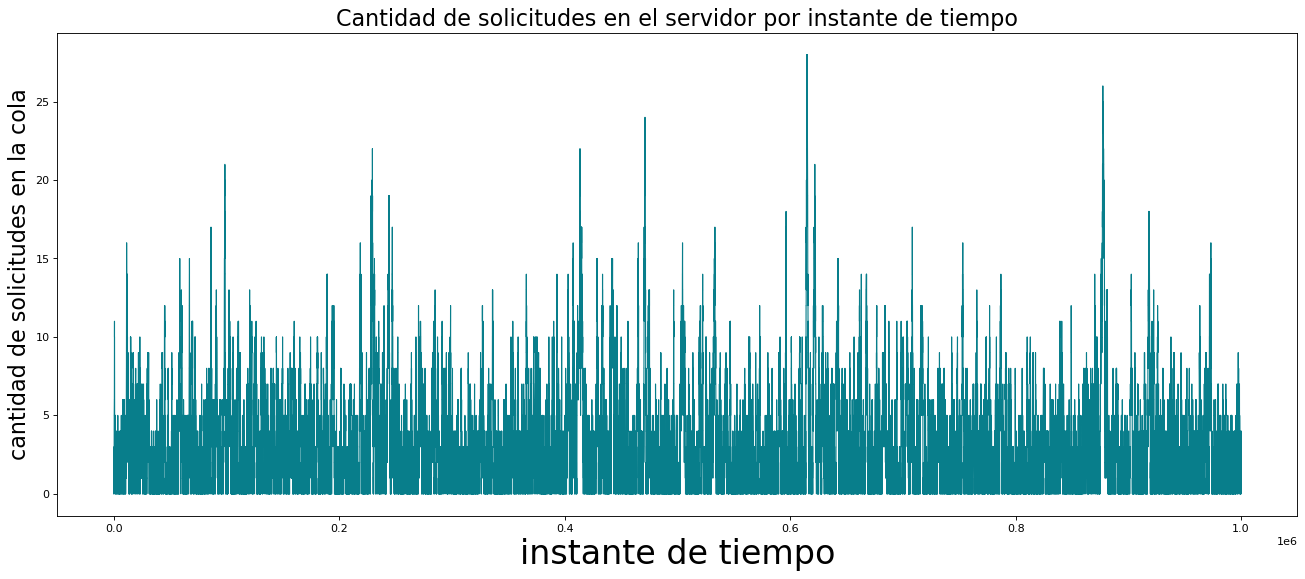

In [63]:
plt.figure(figsize=(20, 8), dpi=80)
plt.title('Cantidad de solicitudes en el servidor por instante de tiempo'.format(N), size=20)
plt.xlabel('instante de tiempo', size=30)
plt.ylabel('cantidad de solicitudes en la cola', size=20)
plt.plot(historico_solicitudes, color='#087E8B', linewidth=1.0)
plt.show()

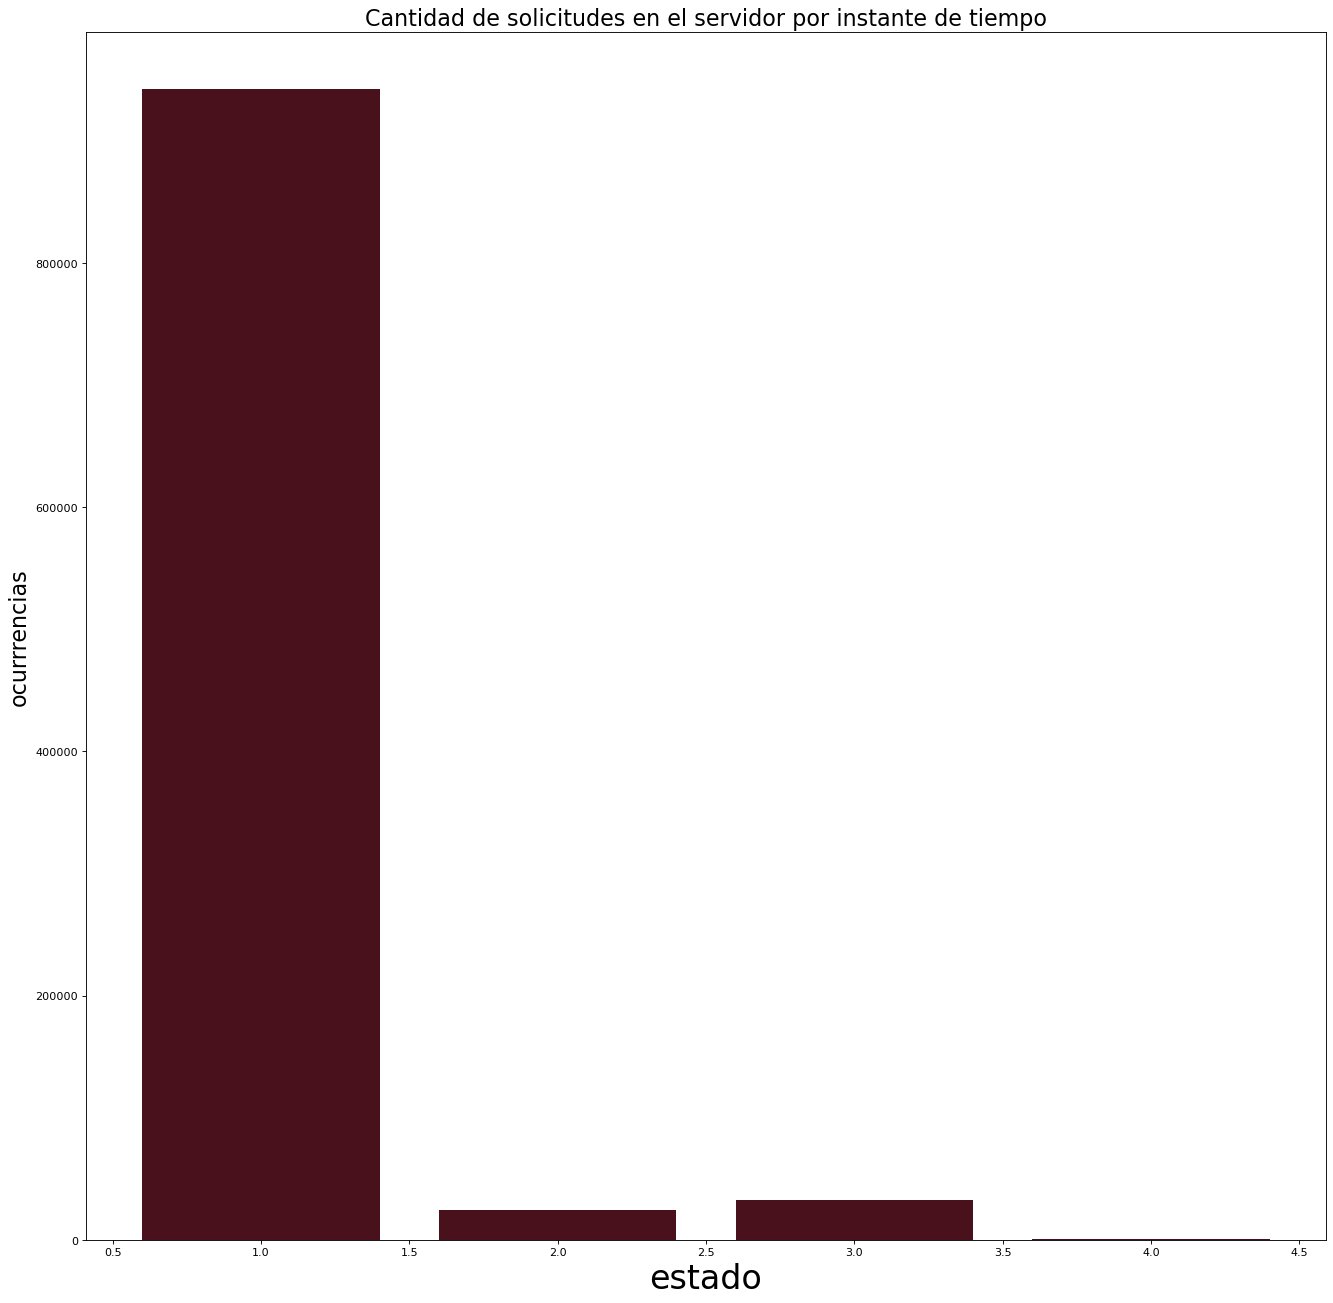

In [65]:
plt.figure(figsize=(20, 20), dpi=80)
plt.title('Cantidad de solicitudes en el servidor por instante de tiempo'.format(N), size=20)
plt.xlabel('estado', size=30)
plt.ylabel('ocurrrencias', size=20)
plt.bar([1, 2, 3, 4], [historico_estados.count(1), historico_estados.count(2), 
                       historico_estados.count(3), historico_estados.count(4)], color='#49111C')
plt.show()

% de tiempo que se encuentra sin procesar solicitudes:

In [68]:
porcentaje = (historico_estados.count(1) + historico_estados.count(2))/len(historico_estados) * 100
porcentaje

96.67950332049668